In [17]:
import mirdata
import matplotlib.pyplot as plt
from utils import (
    smooth_pitch_curve, expand_zero_regions, 
    interpolate_below_length, pitch_seq_to_cents, 
    subsample_series)

In [2]:
data_home = 'mirdatasets/Saraga'
dataset_name = 'saraga_carnatic'

In [3]:
dataset = mirdata.initialize(data_home=data_home, dataset_name=dataset_name)

In [4]:
#dataset.download(force_overwrite=True)

INFO: Downloading ['all', 'index']. Index is being stored in /home/vivek/anaconda3/envs/moresvaras/lib/python3.10/site-packages/mirdata/datasets/indexes, and the rest of files in mirdatasets/Saraga
INFO: [all] downloading saraga1.5_carnatic.zip
13.4GB [1:12:54, 3.29MB/s]                                                                                              
INFO: [index] downloading saraga_carnatic_index_1.5.json
544kB [00:00, 900kB/s]                                                                                                  


In [5]:
data = dataset.load_tracks()

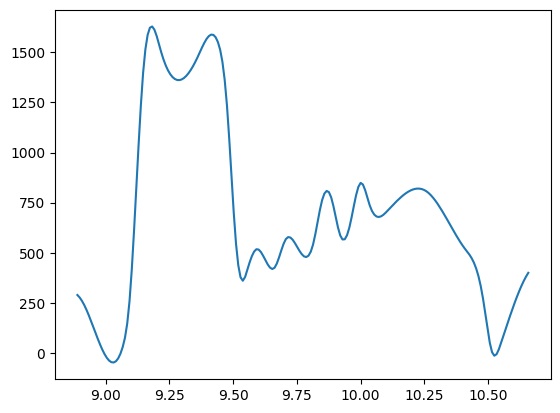

In [54]:
for track_id, track in data.items():
    
    tonic = track.tonic
    pitch = track.pitch
    if not pitch:
        continue
    tempo = track.tempo
    beat = tempo['tempo_bpm'] / 60
    
    frequencies = pitch.frequencies
    times = pitch.times
    timestep = times[3] - times[2]

    frequencies = expand_zero_regions(frequencies, round(0.02/timestep))
    frequencies = interpolate_below_length(frequencies, 0, (100*0.001/timestep))
    cents = pitch_seq_to_cents(frequencies, tonic=tonic)
    time, cents = subsample_series(times, cents, 0.5)
    time_beat = time/beat
    cents = smooth_pitch_curve(time_beat, cents, smoothing_factor=0.4)

    plt.plot(time[1000:1200], cents[1000:1200])

    break